In [336]:
import pandas as pd
import ssl
import numpy as np
from pathlib import Path
import sqlalchemy

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

database_connection_string = 'sqlite:///SP500.db'
engine = sqlalchemy.create_engine(database_connection_string)

## Reading the input data from the database

In [337]:
SectorDF = pd.read_sql_table('SectorDF', engine)
SectorDF = SectorDF.drop(columns=['timestamp'])
SectorDF

,SPY Open,SPY Close,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy,SPY
0,412.86,411.45,-0.001641,0.006510,0.000045,-0.000767,0.000146,-0.000002,0.016096,-0.004232,-0.003210,0.007684,0.001140,0.0
1,413.79,415.87,-0.000804,0.000509,-0.004617,-0.004491,-0.001597,-0.002539,0.007733,0.010694,0.009282,-0.004979,0.020342,1.0
2,417.29,417.26,0.000453,0.011926,0.004855,0.003417,0.005316,-0.004535,0.011355,-0.001082,0.004324,0.011913,-0.006888,0.0
3,416.26,415.21,-0.003498,0.002819,-0.002692,-0.003881,0.001754,0.002421,0.002735,-0.004246,-0.001499,-0.003487,-0.018957,0.0
4,413.93,412.17,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,445.67,448.77,0.002059,0.011917,-0.003392,-0.005008,0.009086,-0.006456,0.019110,-0.000604,-0.004417,0.014811,-0.010703,1.0
250,448.04,447.57,0.005856,0.021049,0.005208,-0.009337,0.008555,0.004695,-0.003217,-0.001480,0.004416,-0.004456,0.002626,0.0
251,444.11,439.92,-0.005791,0.005426,-0.007141,0.001863,0.001890,0.004482,0.001318,0.002899,0.002020,0.001696,0.027976,0.0
252,443.02,438.29,-0.001636,-0.016449,-0.008222,-0.001345,-0.002333,0.006947,-0.014041,-0.002284,-0.001462,-0.010802,-0.018648,0.0


## Defining the datasets

In [338]:
# Define the target set y using the SPY column
y = SectorDF["SPY"]

# Display a sample of y
y[:5]

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: SPY, dtype: float64

In [339]:
# Define features set X by selecting all columns but SPY
X = SectorDF.drop(columns=["SPY",'SPY Open','SPY Close'])

# Review the features DataFrame
X.head()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
0,-0.001641,0.006510,0.000045,-0.000767,0.000146,-0.000002,0.016096,-0.004232,-0.003210,0.007684,0.001140
1,-0.000804,0.000509,-0.004617,-0.004491,-0.001597,-0.002539,0.007733,0.010694,0.009282,-0.004979,0.020342
2,0.000453,0.011926,0.004855,0.003417,0.005316,-0.004535,0.011355,-0.001082,0.004324,0.011913,-0.006888
3,-0.003498,0.002819,-0.002692,-0.003881,0.001754,0.002421,0.002735,-0.004246,-0.001499,-0.003487,-0.018957
4,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944


In [340]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [341]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Defining testing parameters and creating Neural Model

In [342]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features

11

In [343]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 30 #(number_input_features + 1) // 2 

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 15 #(hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layers = hidden_nodes_layer1 + hidden_nodes_layer2
hidden_nodes_layers

45

In [344]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [345]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 30)                360       
                                                                 
 dense_72 (Dense)            (None, 15)                465       
                                                                 
 dense_73 (Dense)            (None, 1)                 16        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


## Compiling the model and fit the training data

In [346]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [347]:
# Fit the model using 350 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=350)

Epoch 1/350
6/6 [==============================] - 0s 2ms/step - loss: 0.7492 - accuracy: 0.4368
Epoch 2/350
6/6 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.5053
Epoch 3/350
6/6 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.4947
Epoch 4/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 5/350
6/6 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5263
Epoch 6/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5421
Epoch 7/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5789
Epoch 8/350
6/6 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.5947
Epoch 9/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.5842
Epoch 10/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.5737
Epoch 11/350
6/6 [===========

## Evaluating the model loss and accuracy using train data

In [349]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the TRAIN data
model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train,verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.09001778066158295, Accuracy: 0.9894737005233765


In [350]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<AxesSubplot:>

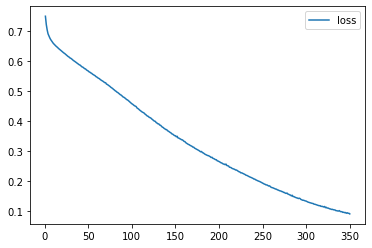

In [351]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

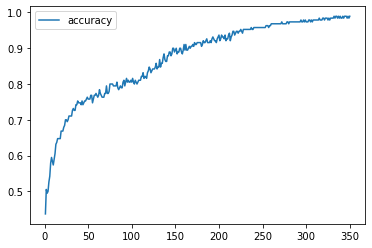

In [352]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")

## Evaluating the model loss and accuracy using test data

In [353]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the TEST data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.5853939056396484, Accuracy: 0.515625


## Saving the model

In [354]:
# Set the model's file path
file_path = Path("resources/nnmodel.h5")

# Export your model to an HDF5 file
nn.save(file_path)